## 🎯 Goal of the Project

The main goal of this project is to analyze and visualize student performance in exams to uncover patterns, insights, and relationships between different factors affecting performance. Specifically, this project helps to:

1. Understand data cleaning techniques 

2. Visualize performance trends
3. Explore relationships between features 

4. Segment students by performance  

##### Load Dataset


In [ ]:
#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('StudentsPerformance.csv')
#first 5 row of dataset
df.head()

 

##### Explore data


In [15]:
# Dataset info 
print("\n Data set info:",df.info())

#Summary statistics

print("Summary statistics:",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   950 non-null    float64
 6   reading score                970 non-null    float64
 7   writing score                980 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB

 Data set info: None
Summary statistics:        math score  reading score  writing score
count  950.000000     970.000000     980.000000
mean    65.908421      69.236082      68.175510
std     15.189184      14.614585      15.120078
min      0.000000      17.00

###### insight
1. Total entries: 1000 students

2. Columns: 8 (5 categorical, 3 numeric: math, reading, writing scores)

3. Missing values:

Math: 50 missing (950 non-null)

Reading: 30 missing (970 non-null)

Writing: 20 missing (980 non-null)


4. 
The dataset is mostly complete, but some missing values exist in scores. This is realistic for real-world data.

##### cleaning data


In [16]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values with median
df['math score'] = df['math score'].fillna(df['math score'].median())
df['reading score'] = df['reading score'].fillna(df['reading score'].median())
df['writing score'] = df['writing score'].fillna(df['writing score'].median())

# Verify
df.isnull().sum()

Missing values before cleaning:
 gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     50
reading score                  30
writing score                  20
dtype: int64


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### statistical Analysis 


In [17]:
# Overall descriptive stats
desc = df[['math score','reading score','writing score']].describe()
print(desc)


        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     65.913000      69.259000      68.192000
std      14.804209      14.394065      14.968406
min       0.000000      17.000000      10.000000
25%      57.000000      60.000000      58.000000
50%      66.000000      70.000000      69.000000
75%      76.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000


###### Insight
Mean scores: Math ~66, Reading ~69, Writing ~68.

Math has slightly more variability (std ~15).

Minimum scores: Math = 0 → indicates possible low performers or missing attempts.

25th–75th percentiles show most students score between ~56–76 in math, ~59–79 in reading.

##### Visulaization 

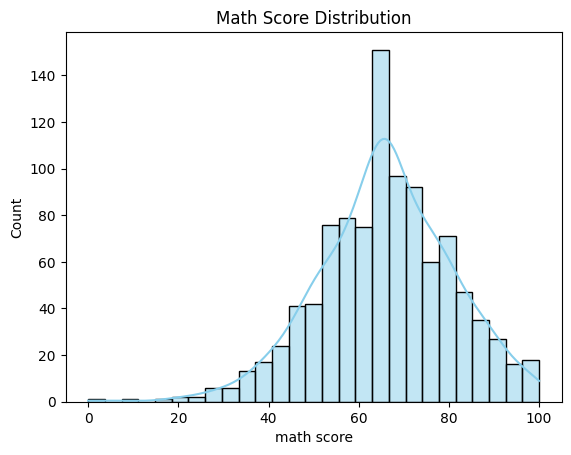

In [18]:
#Distribution of Math score 
sns.histplot(df['math score'],kde=True,color='skyblue')
plt.title("Math Score Distribution")
plt.show()


###### Insight:
1. Math scores are roughly normaly distributed
2. Most of the scores are between 60-80

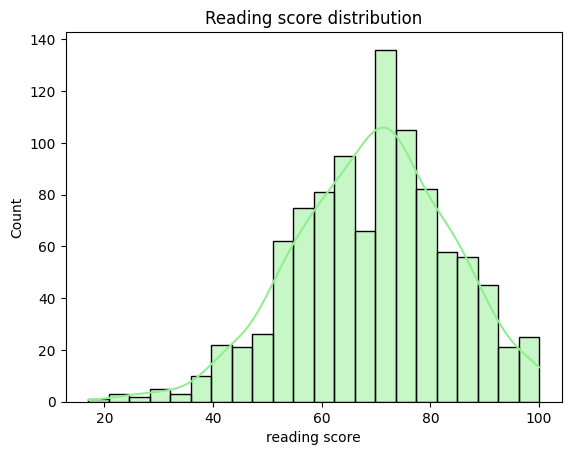

In [20]:
#Distribution of reading-score
sns.histplot(df['reading score'],kde=True,color='lightgreen')
plt.title("Reading score distribution")
plt.show()

###### Insight:
1. Reading scores are roughly normaly distributed
2. Most of the scores are between 60-80

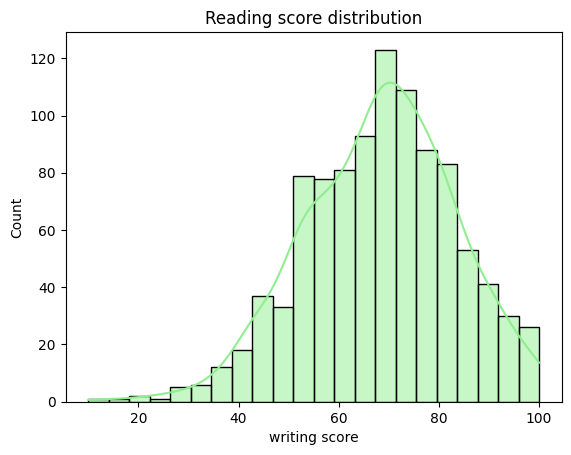

In [21]:
#Distribution of writing-score
sns.histplot(df['writing score'],kde=True,color='lightgreen')
plt.title("Reading score distribution")
plt.show()

###### Insight:
1. Writing scores are roughly normaly distributed
2. Most of the scores are between 60-80

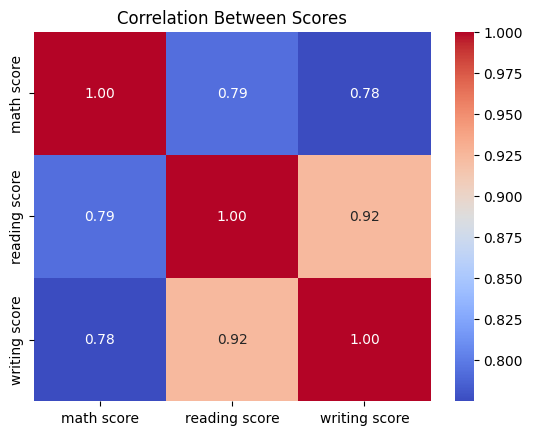

In [23]:
corr_matrix = df[['math score','reading score','writing score']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()


###### Insight

Reading & Writing strongly correlated (~0.82).

Math moderately correlated with reading/writing (~0.7).

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\3655903002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='Set2', ax=axes[0])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\3655903002.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette='Set2', ax=axes[1])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\3655903002.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette='Set2', ax=axes[2])


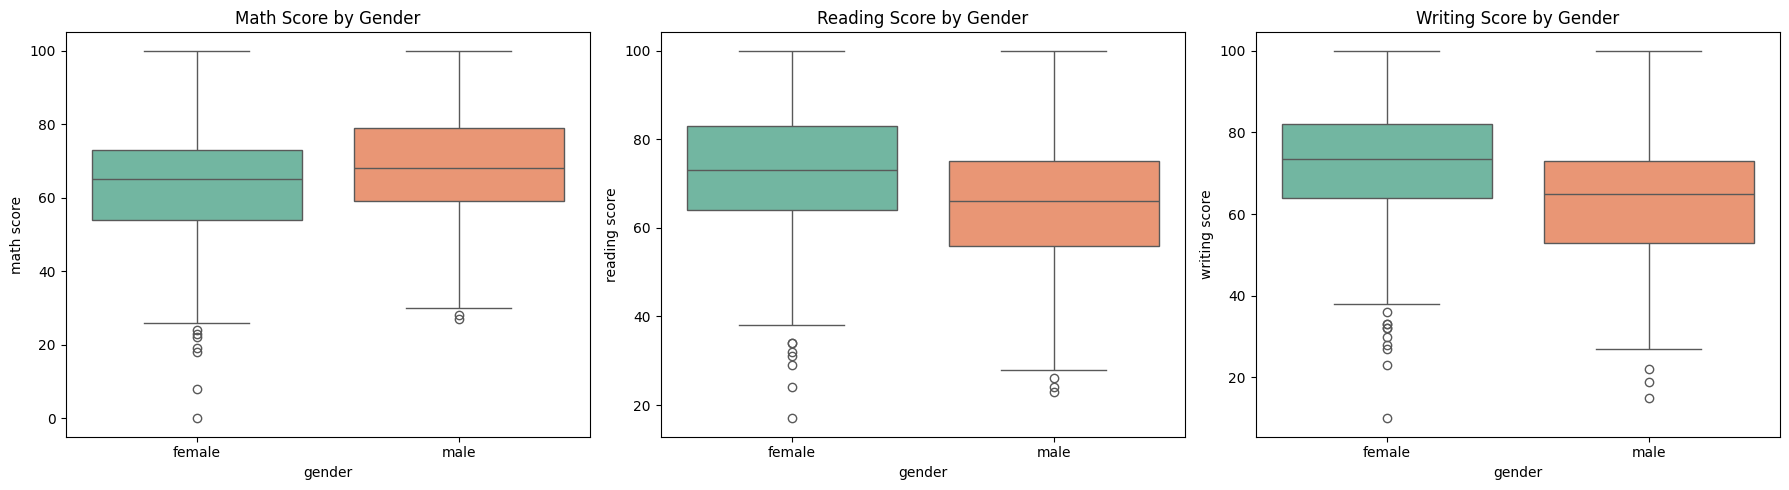

In [24]:
## SCores By Gender
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(x='gender', y='math score', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Math Score by Gender')

sns.boxplot(x='gender', y='reading score', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Reading Score by Gender')

sns.boxplot(x='gender', y='writing score', data=df, palette='Set2', ax=axes[2])
axes[2].set_title('Writing Score by Gender')

plt.tight_layout()
plt.show()



##### Insight
Math: No significant difference between genders.

Reading/Writing: Female students consistently outperform males.

Outliers: Both genders have extreme low and high performers, especially in math.

Consistency: Females show slightly more consistent literacy performance (reading/writing).

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\2050889283.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=df, palette='Set3', ax=axes[0])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\2050889283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='reading score', data=df, palette='Set3', ax=axes[1])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\2050889283.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of educatio

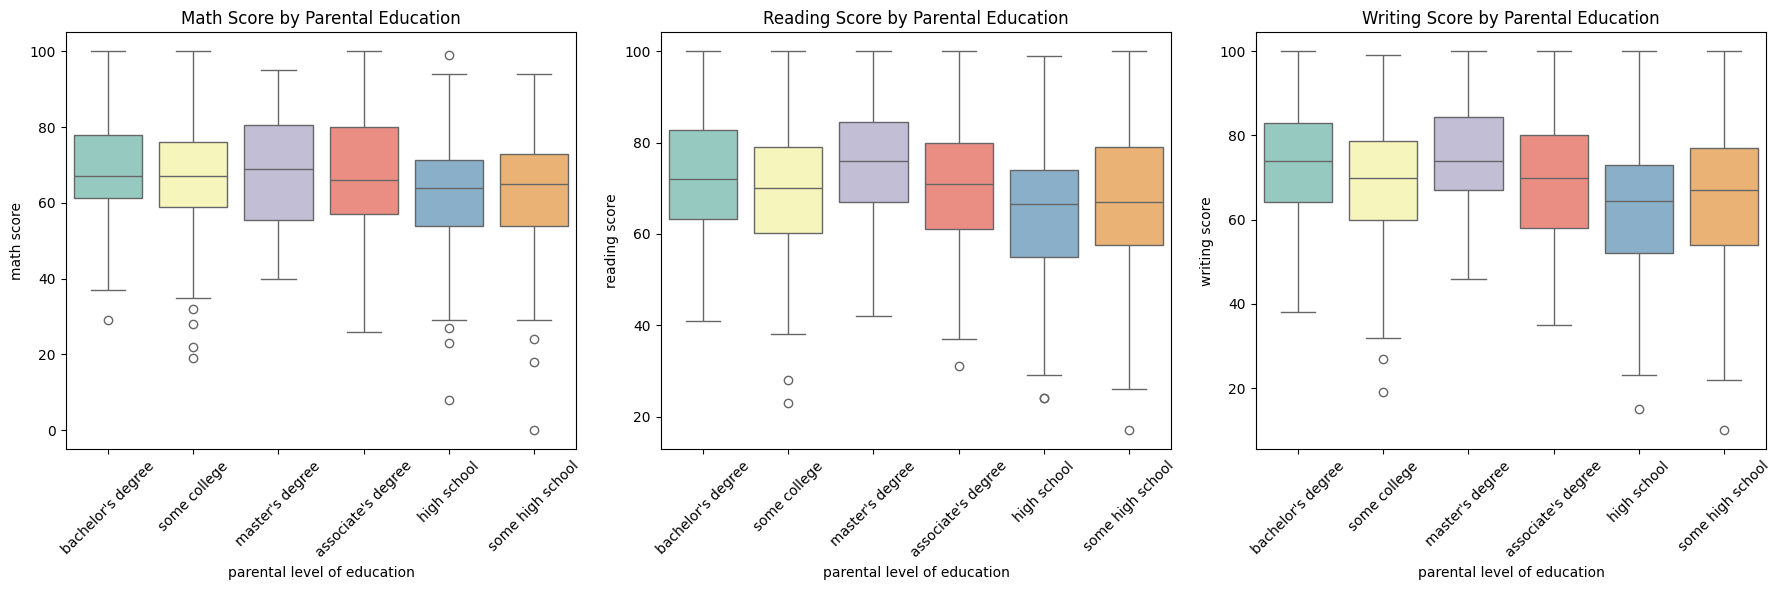

In [25]:
# scores by parental Education

fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(x='parental level of education', y='math score', data=df, palette='Set3', ax=axes[0])
axes[0].set_title('Math Score by Parental Education')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='parental level of education', y='reading score', data=df, palette='Set3', ax=axes[1])
axes[1].set_title('Reading Score by Parental Education')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='parental level of education', y='writing score', data=df, palette='Set3', ax=axes[2])
axes[2].set_title('Writing Score by Parental Education')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### insight
higher parental education tends to correlate with better and more consistent student performance across all three subjects, especially in reading and writing. 


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4066148656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='math score', data=df, palette='Set1', ax=axes[0])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4066148656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='reading score', data=df, palette='Set1', ax=axes[1])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4066148656.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='writi

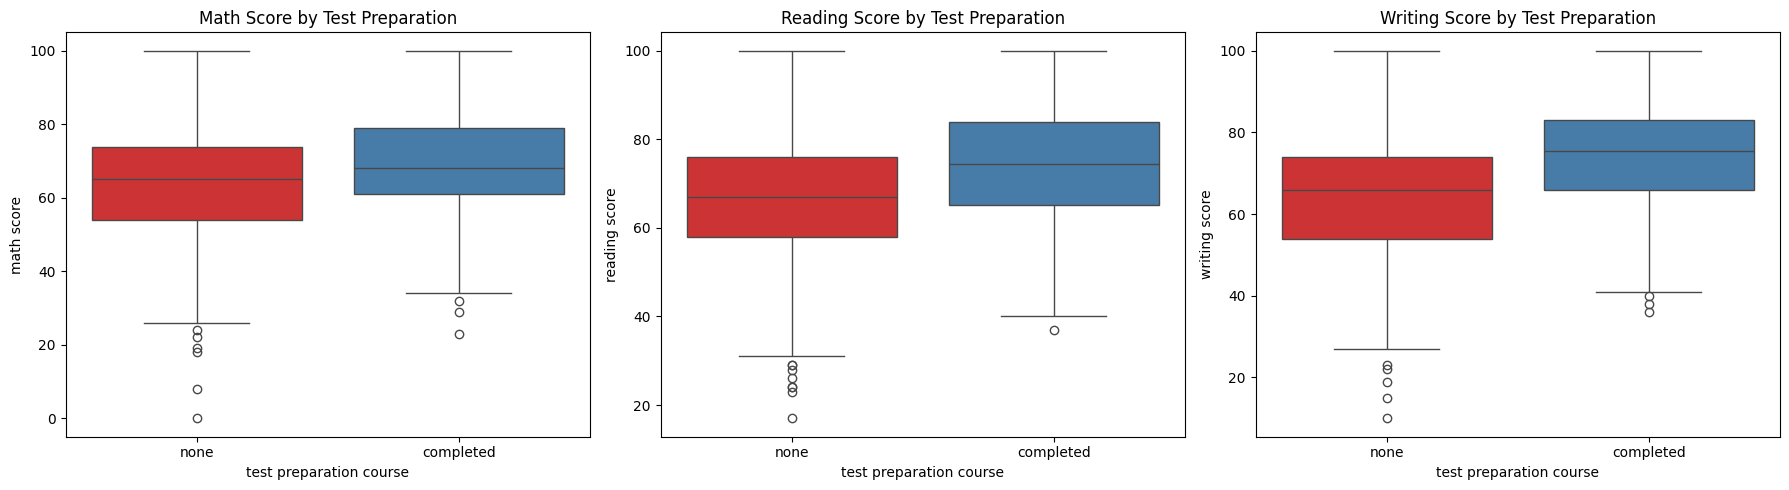

In [26]:
## Score by Test Preparation 

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(x='test preparation course', y='math score', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Math Score by Test Preparation')

sns.boxplot(x='test preparation course', y='reading score', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Reading Score by Test Preparation')

sns.boxplot(x='test preparation course', y='writing score', data=df, palette='Set1', ax=axes[2])
axes[2].set_title('Writing Score by Test Preparation')

plt.tight_layout()
plt.show()



###### Insight

completing the test preparation course consistently improves scores across all subjects, especially by lifting the lower performers and tightening score variability


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4177500932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='math score', data=df, palette='Pastel1', ax=axes[0])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4177500932.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='reading score', data=df, palette='Pastel1', ax=axes[1])
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_4888\4177500932.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='writing score', data=df, palette='Pastel1', ax=axes[2

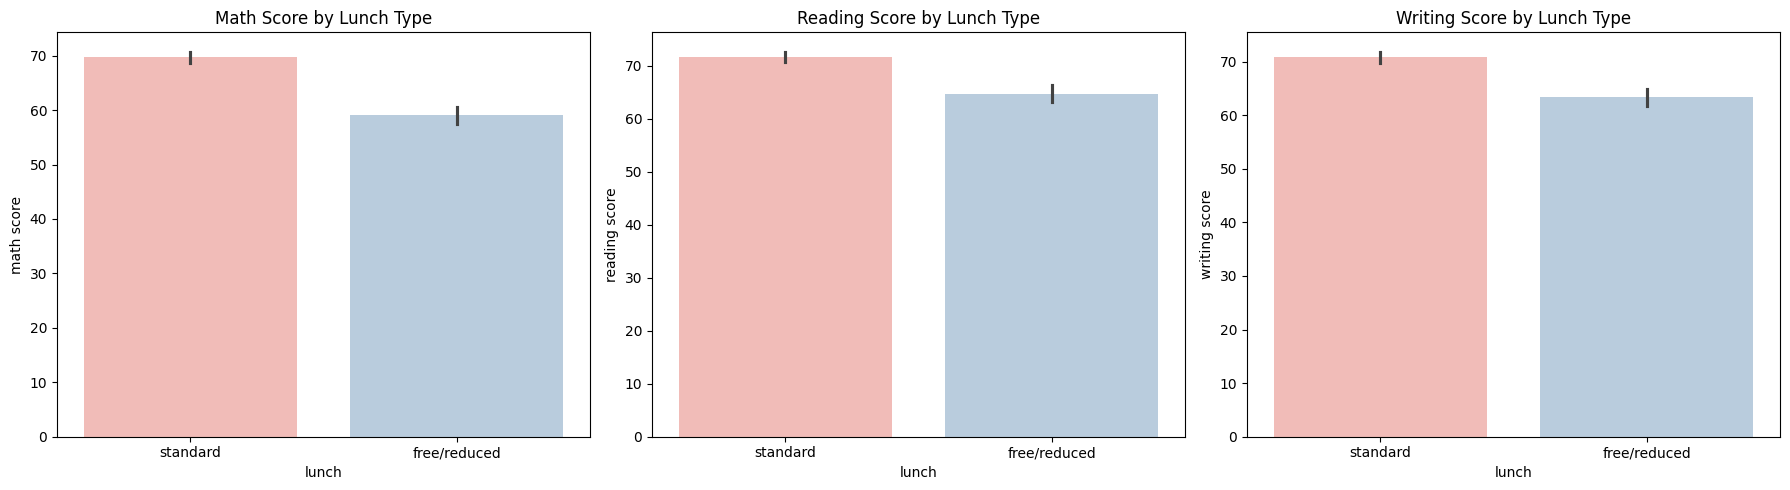

In [27]:
# Scores by Lunch Type
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='lunch', y='math score', data=df, palette='Pastel1', ax=axes[0])
axes[0].set_title('Math Score by Lunch Type')

sns.barplot(x='lunch', y='reading score', data=df, palette='Pastel1', ax=axes[1])
axes[1].set_title('Reading Score by Lunch Type')

sns.barplot(x='lunch', y='writing score', data=df, palette='Pastel1', ax=axes[2])
axes[2].set_title('Writing Score by Lunch Type')

plt.tight_layout()
plt.show()


###### Insight

 students receiving standard lunch tend to perform better across all subjects, hinting at the role of socioeconomic factors in academic outcomes
